# <center> Udacity Data Analysis Nanodegree </center>
   ## <center> Project: WeRateDogs Twitter Data </center>
   ### <center> Noaman Mangera, July 2020 <center>


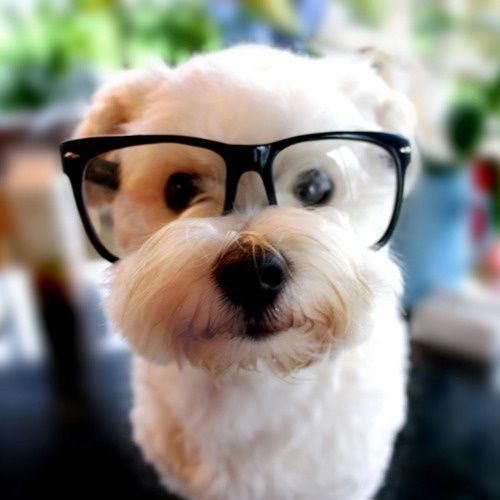

The focus for this project is on wrangling data from the WeRateDogs Twitter account. This particular Twitter account rates dogs to humorous effect with a unique rating system. WeRateDogs has over 4 million followers and is known to have received international acclaim.

WeRateDogs generously shared their Twitter archive for use in this project. This archive contains basic tweet data for 5000+ tweets as they stood on August 1, 2017. This archival data is augmented with image predictions of dog breeds using a neural network. The third and final piece of data used to triangulate the analysis is common metrics of tweet popularity on the platform such as the number of retweets.

Cleaned, this data provides interesting insights into the dynamics of social engagement within the context analysed.

In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns

#plot visualisation within notebook
%matplotlib inline

#read in cleaned dataframe
df = pd.read_csv(r"C:\Users\noama\twitter_archive_master.csv")

**Question: What variables are recorded, and how do they behave?**

In [2]:
#statistical summary of numerical variables
df.describe().round(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,Breed_Confidence1,Breed_Confidence2,Breed_Confidence3,retweet_count,favorite_count
count,1.294000e+03,1.400000e+01,1.400000e+01,1294.00,1294.00,1294.00,1294.00,1294.00,1294.00,1294.00,1294.0
mean,7.328135e+17,7.014357e+17,4.196984e+09,10.70,10.14,1.19,0.59,0.14,0.06,2582.71,8373.7
std,6.639940e+16,5.182081e+16,0.000000e+00,4.07,2.66,0.54,0.27,0.10,0.05,4006.12,11194.7
min,6.660293e+17,6.671522e+17,4.196984e+09,1.00,2.00,1.00,0.04,0.00,0.00,16.00,81.0
25%,6.748540e+17,6.724958e+17,4.196984e+09,10.00,10.00,1.00,0.35,0.05,0.02,602.75,1761.5
50%,7.062785e+17,6.756022e+17,4.196984e+09,11.00,10.00,1.00,0.58,0.12,0.05,1305.50,3904.0
75%,7.797201e+17,7.032024e+17,4.196984e+09,12.00,10.00,1.00,0.84,0.20,0.09,3111.25,10490.5
max,8.918152e+17,8.558181e+17,4.196984e+09,88.00,80.00,4.00,1.00,0.47,0.27,56625.00,107015.0


**Observations**

1. The bulk of the distribution for the variable rating_numerator is between 10 and 12, suggesting a rating within this range can be considered "normal".
2. The median value for Breed_Confidence1 is perceptibly larger than its counterpart for Breed_Confidence2 and Breed_Confidence3, indicating a signifiacntly higher level of confidence in its primary estimation.
3. A more than doubling is required to move from the 25th percentile to the 50th percentile (and from the 50th percentile to the 75th percentile) for the variable favorite_count, suggesting an exponential relationship. Said otherwise, popular dogs garner vastly more attention than their less aesthetically-pleasing compatriots. 

**Question: How do different factors of interest correlate with each other?**

A correlated inspection approach is adopted to determine if there is any relationship between different factors of interest. The results are summarised as follows:

In [3]:
#create correlation matrix using numerical data
cor = df[['rating_numerator', 'rating_denominator', 'Breed_Confidence1', 'Breed_Confidence2', 
          'Breed_Confidence3', 'retweet_count', 'favorite_count']].corr()
cor

,rating_numerator,rating_denominator,Breed_Confidence1,Breed_Confidence2,Breed_Confidence3,retweet_count,favorite_count
rating_numerator,1.000000,0.695231,0.075996,-0.016959,-0.028430,0.164475,0.210400
rating_denominator,0.695231,1.000000,0.026458,-0.024029,-0.018818,-0.016800,-0.023953
Breed_Confidence1,0.075996,0.026458,1.000000,-0.507339,-0.696568,0.069650,0.096818
Breed_Confidence2,-0.016959,-0.024029,-0.507339,1.000000,0.478463,-0.016125,-0.008048
Breed_Confidence3,-0.028430,-0.018818,-0.696568,0.478463,1.000000,-0.047686,-0.049941
retweet_count,0.164475,-0.016800,0.069650,-0.016125,-0.047686,1.000000,0.916017
favorite_count,0.210400,-0.023953,0.096818,-0.008048,-0.049941,0.916017,1.000000


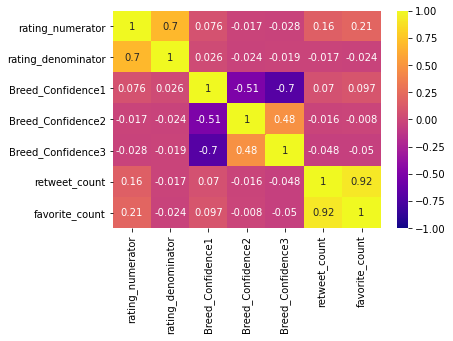

In [4]:
#create heatmap of correlation between numerical variables
sns.heatmap(cor, annot=True, cmap='plasma', vmin=-1, vmax=1);

**Observations**

1. With this it is safe to conclude the number of retweets is stongly correlated with the count of users who favorite a tweet. This is deducible with the near perfect correlation of (0.92) between the two variables.

2. Counter-intuitively retweet_count and favorite_count are weakly correlated with rating_numerator, suggesting a difference in subjective evaluations given by WeRateDogs and the popularity of tweets among the public.

**References:**

>Image: https://www.pinterest.com/pin/181762534933378846/
